In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px
import scipy.stats as st
import numpy as np


In [3]:
data_df = pd.read_csv('Resources/Crime_Data_from_2020_to_Present.csv')

main_df = data_df[['DR_NO', 'DATE OCC', 
                   'TIME OCC', 'Vict Age', 
                   'Vict Sex','Vict Descent',
                  'LAT', 'LON']]
main_df.count()

DR_NO           757141
DATE OCC        757141
TIME OCC        757141
Vict Age        757141
Vict Sex        658230
Vict Descent    658224
LAT             757141
LON             757141
dtype: int64

In [4]:
# disclaimer for dropping missing age data
cleaning_df = main_df.set_index('DR_NO')
cleaning_df = cleaning_df.loc[(cleaning_df['Vict Age'] > 0) & 
                              (cleaning_df['Vict Sex'] != "H") &
                              (cleaning_df['Vict Descent'] != "-")]                              
cleaning_df = cleaning_df.reset_index()

cleaning_df = cleaning_df.dropna(how='any')


In [5]:
final_df = cleaning_df.rename(columns={'DR_NO': 'File Number',
                                      'DATE OCC': 'Date Occurred',
                                      'TIME OCC': 'Time Occurred',
                                      'LAT': 'Latitude',
                                      'LON': 'Longitude'})
#final_df = final_df.set_index('File Number')
final_df.head()

,File Number,Date Occurred,Time Occurred,Vict Age,Vict Sex,Vict Descent,Latitude,Longitude
0,10304468,01/08/2020 12:00:00 AM,2230,36,F,B,34.0141,-118.2978
1,190101086,01/01/2020 12:00:00 AM,330,25,M,H,34.0459,-118.2545
2,191501505,01/01/2020 12:00:00 AM,1730,76,F,W,34.1685,-118.4019
3,191921269,01/01/2020 12:00:00 AM,415,31,X,X,34.2198,-118.4468
4,200100501,01/01/2020 12:00:00 AM,30,25,F,H,34.0452,-118.2534


In [6]:
#add a new column that allows us to separate data by year

final_df['Date Occurred'] = pd.to_datetime(final_df['Date Occurred'], format='%m/%d/%Y %I:%M:%S %p')
final_df['Year'] = final_df['Date Occurred'].dt.year

final_df.head()

,File Number,Date Occurred,Time Occurred,Vict Age,Vict Sex,Vict Descent,Latitude,Longitude,Year
0,10304468,2020-01-08,2230,36,F,B,34.0141,-118.2978,2020
1,190101086,2020-01-01,330,25,M,H,34.0459,-118.2545,2020
2,191501505,2020-01-01,1730,76,F,W,34.1685,-118.4019,2020
3,191921269,2020-01-01,415,31,X,X,34.2198,-118.4468,2020
4,200100501,2020-01-01,30,25,F,H,34.0452,-118.2534,2020


In [26]:
# Analysis for Victim Age

# Calculating measures of central tendancy of victim age

vict_ages = final_df['Vict Age']

# Calculating measures for average for years from 2020 - 2023
overall_mean_age = np.mean(vict_ages)
print (f"The average age of victims in LA from 2020 - 2023 is {round(overall_mean_age)} years old.")

overall_median_age = np.median(vict_ages)
print (f"The median age of victims in LA from 2020 - 2023 is {round(overall_median_age)} years old.")

overall_var_age = np.var(vict_ages, ddof = 0)
print(f"The variance of victim age population in LA from 2020 - 2023 is {round(overall_var_age,2)}")

overall_stdev_age = np.std(vict_ages, ddof = 0)
print(f"The population standard deviation of victim age in LA from 2020 - 2023 is {round(overall_stdev_age,2)}")


The average age of victims in LA from 2020 - 2023 is 40 years old.
The median age of victims in LA from 2020 - 2023 is 37 years old.
The variance of victim age population in LA from 2020 - 2023 is 242.33
The population standard deviation of victim age in LA from 2020 - 2023 is 15.57


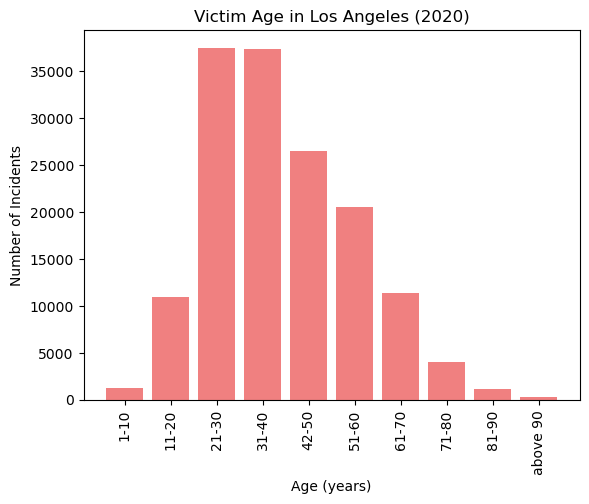

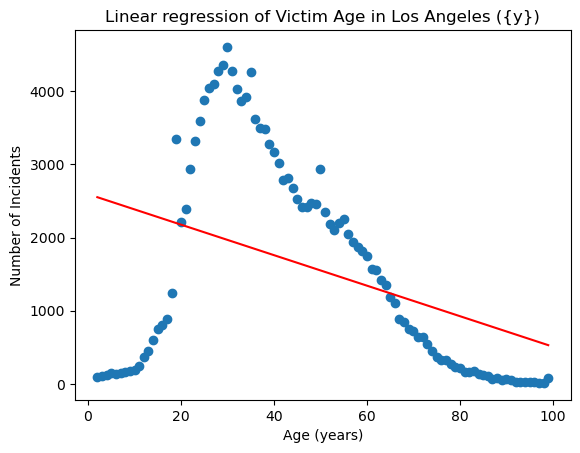

As per the linear regression analysis performed on the age of the victims, the correlation between both factors is -0.41.


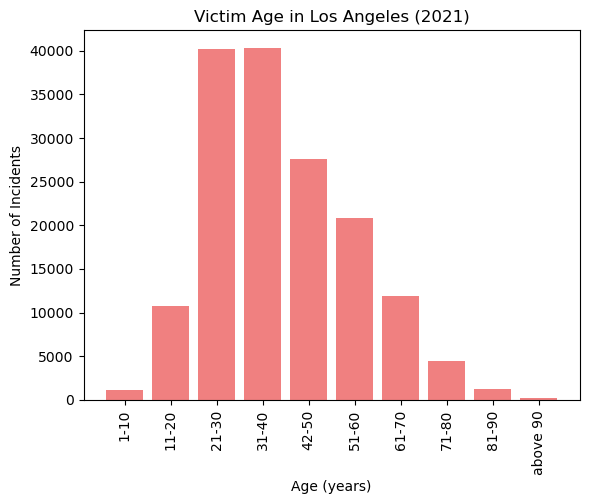

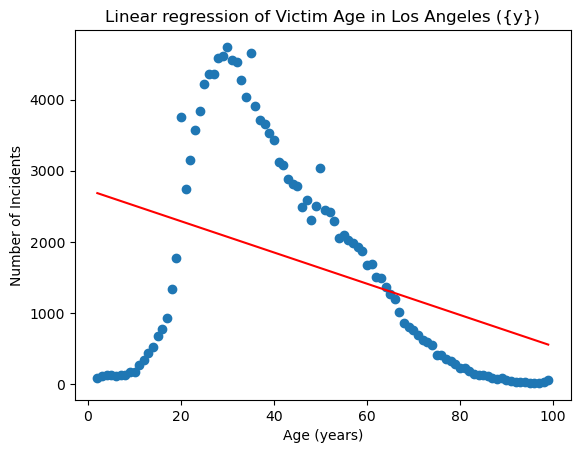

As per the linear regression analysis performed on the age of the victims, the correlation between both factors is -0.4.


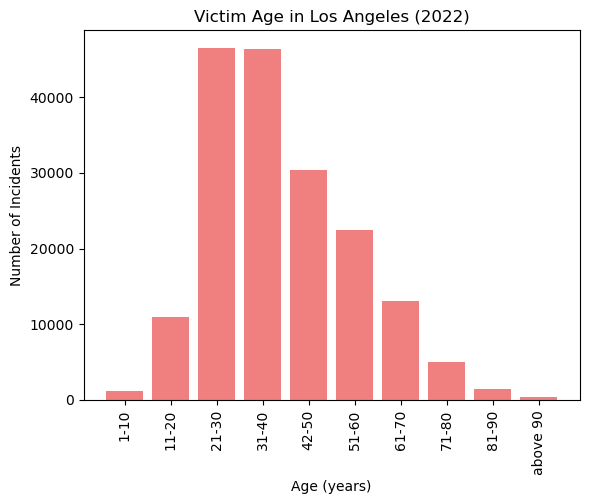

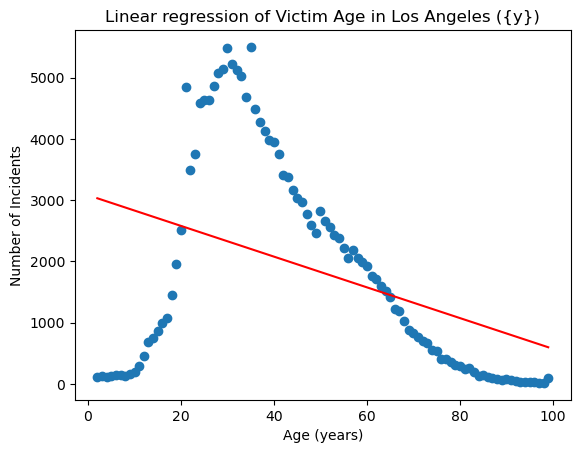

As per the linear regression analysis performed on the age of the victims, the correlation between both factors is -0.41.


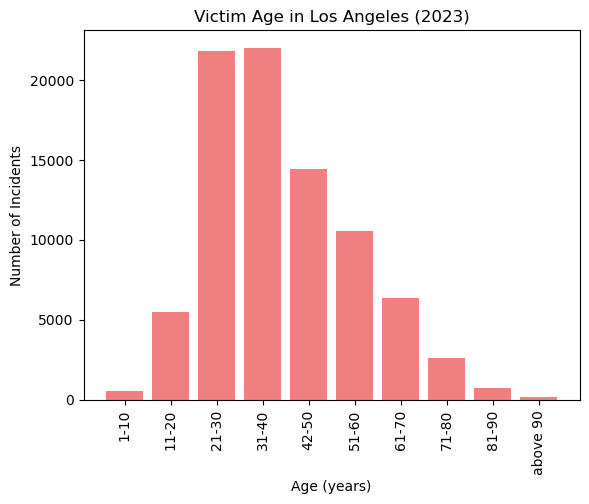

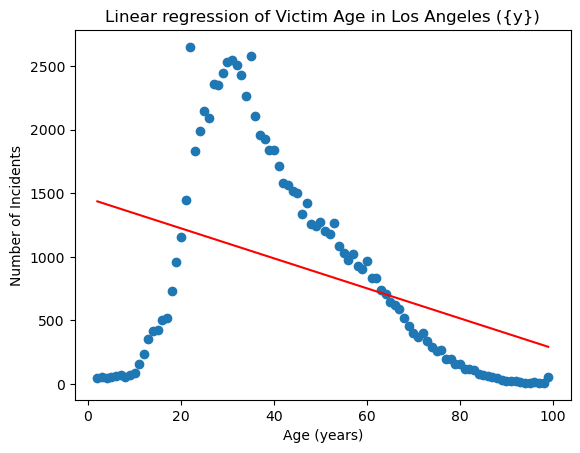

As per the linear regression analysis performed on the age of the victims, the correlation between both factors is -0.41.
Based on the correlation calculation, there is a weak negative correlation between the age and number of victims of crime in Los Angeles from January 2020 - July 2023.


In [27]:
# Analysis for Victim Age

# Counting number of Victims by Age and grouping by Year and Age
age_df = final_df.groupby(['Year', 'Vict Age']).size()
age_df= age_df.reset_index(name='Number of Incidents')

# Bar plot analysis
# Bins that hold data
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 

# Labels for bins
group_label = ["1-10", "11-20", "21-30", "31-40", "42-50", "51-60", "61-70", "71-80", "81-90", "above 90"]

# Duplicating the main dataframe to group it by age
age_df2 = age_df
age_df2['Age group'] = pd.cut(age_df2['Vict Age'], bins, labels=group_label)

age_count_df2 = age_df2.groupby(['Year','Age group']).sum().reset_index()

# Creating a list
years = age_df['Year'].unique()

# Creating graphs for each year
for y in years:
    
    year_data = age_count_df2[age_count_df2['Year'] == y]
    
    #Bar plot
    plt.bar(year_data['Age group'], year_data['Number of Incidents'], align="center", color='lightcoral')
    plt.xticks(rotation="vertical")
    plt.xlabel("Age (years)")
    plt.ylabel("Number of Incidents")
    plt.title(f"Victim Age in Los Angeles ({y})")
    plt.show()


    # Scatter Plot analysis
    year_data2 = age_df[age_df['Year'] == y]
    vict_age = year_data2['Vict Age']
    vict_count = year_data2['Number of Incidents']

    # Performing linear regression on the scatter plot
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(vict_age, vict_count)
    regress_values = vict_age * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

    plt.scatter(vict_age, vict_count)
    plt.plot(vict_age, regress_values, "r-")
    plt.annotate(line_eq,(0, 9864), fontsize = 15, color="red")
    plt.xlabel("Age (years)")
    plt.ylabel("Number of Incidents")
    plt.title("Linear regression of Victim Age in Los Angeles ({y})")

    plt.show()

    #Correlation calculation
    correlation = st.pearsonr(vict_age, vict_count)

    print (f"As per the linear regression analysis performed on the age of the victims, the correlation between both factors is {round(correlation[0],2)}.")
    
print ("Based on the correlation calculation, there is a weak negative correlation between the age and number of victims of crime in Los Angeles from January 2020 - July 2023.")


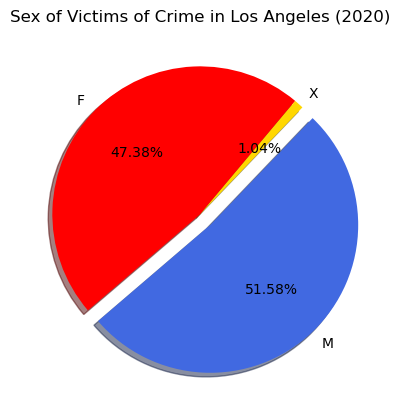

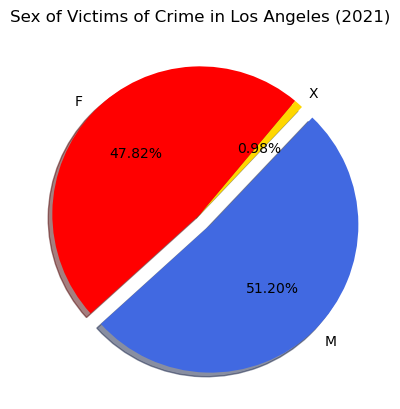

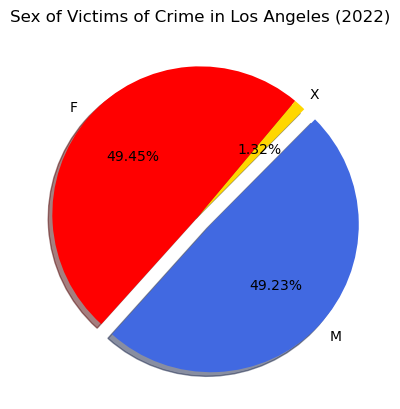

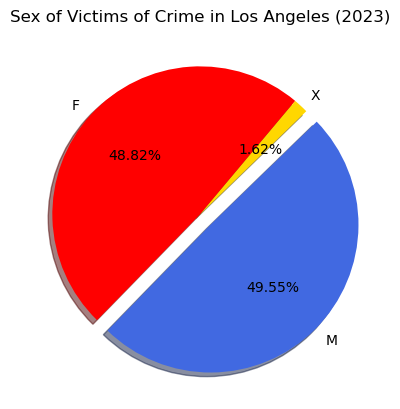

As per the analysis of the sex of people that were victims of crime, there is almost an equal ratio of males and females.


In [28]:
# Analysis for Victim Sex

# Grouping Victims by Sex
sex_df = final_df.groupby(['Year','Vict Sex']).size()
sex_df= sex_df.reset_index(name='Number of Incidents')

explode = [0, 0.1, 0]
colors = ["red", "royalblue", "gold"]

sex_df2 = sex_df.groupby(['Year','Vict Sex']).sum().reset_index()

# Creating a list
years = age_df['Year'].unique()

# Creating graphs for each year
for y in years:
    
    year_data2 = sex_df2[sex_df2['Year'] == y]
   
    # Plotting pie chart to represent Victims by Sex
    plt.pie(year_data2['Number of Incidents'], labels = year_data2['Vict Sex'], explode = explode, colors = colors, 
            autopct="%1.2f%%", shadow = True, startangle = 50)
    plt.title(f"Sex of Victims of Crime in Los Angeles ({y})")
    plt.show()

print ("As per the analysis of the sex of people that were victims of crime, there is almost an equal ratio of males and females.")    